## <font color="powderblue" >Secure Inner Product Computation ⌨</font>

### <font color ="Pink">Algorithm in NuteShell 📔: </font>
A set of encrypted documents, each with two encrypted vocabulary vectors $ d', d'' $ that states which vocabulary exsists in this document, stored on a server such as a cloud provider. We will be able to do a multi keyword search using two encrypted vocabulary vectors  $ q', q'' $  on the server and return the matched result without exposing any information to a server about the document neither the query.

<h4><font type ="italic" color ="Green">Code Author: Mahmoud Srewa  </font>👨 , PhD student at the University of Alabama 🏛 - Alsharif labs</h4>

<h4>Refrence Paper</4> <a href="https://ieeexplore.ieee.org/document/6674958">Privacy-Preserving Multi-Keyword Ranked Search over Encrypted Cloud Data</a> 

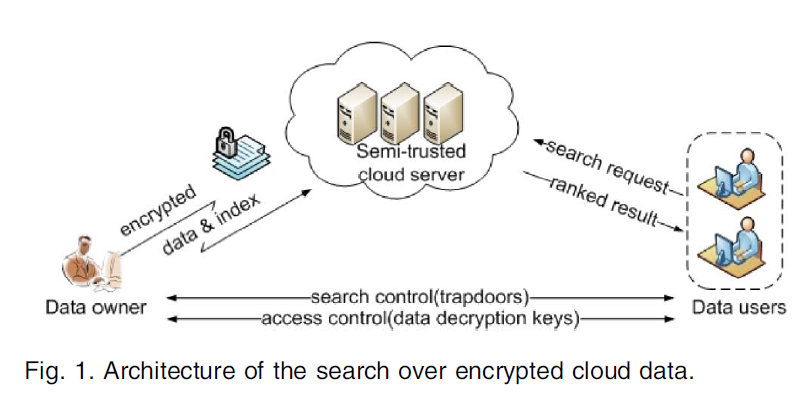





 <h3><font color =  "orange "> *__Steps in Nutshell__* 🍜: </font></h3>



### <u> First the owner should perform some operations on the documents. </u>



1. Create a vocabulary vector of size $n$ that will be used to index the documents.



2. For each document $ d_i \; in \; \{d_1,d_2, \dots, d_k\}$, create a simple vocabulary vector $\vec{p_i}$ index.



3. generate two $n*n$-dimensional random secret key matrices $m_1, m_2$.



4. generate a random vector matrix $S$ of size $n$ which is used as a spliting factor



5. Create two random vectors of size $n$, $\vec{p'_i}$ and $\vec{p''_i}$, which will be used to split the plain index into them.



6. The following is how the splitting phase was completed:



For each document $i$, check if value of $s$ at specific index $i$ equall the following<br>



- If $ s[i] = 0 $, the two split index values at $i$ are equal to the plain index value at $i$.



- If $s[i]=1$, we check the plain index value at $i$.

    - If plainIndex $[i] == 1$, then generate two random numbers with sums of $1$ for both split indexes.
    - If plainIndex $[i] == 0$, then generate two random numbers with sums of zero for both split indexes.


7. now encryption phase of two splited indexes before sending them to the server, as the following
$$ \{M_1\cdot\vec{p'_i} \; , \; M_2\cdot\vec{p''_i}\} $$


8. Finally for each document encrypt it using proper algorithm along with it's encrypted vocabulary index


### <u>Second the User procedure to generate query index</u>



1. Use a vocabulary vector of size $n$ same as the one with the owner that will be used to index the query.



2. For a query generate simple vocabulary vector $\vec{q}$ index the corresponds to keywards you are looking for.



3. Recvice from the owner  two $n*n$-dimensional random secret key matrices which is $m_1^{-1}, m_2^{-1}$.



4. Recvice from the owner vector matrix $S$ of size $n$ which is used as a spliting factor



5. Create two random vectors of size $n$, $\vec{q'_i}$ and $\vec{q''_i}$, which will be used to split the plain index into them.


6. For query index, check if value of $s$ at specific index $i$ equall the following<br>



- If $s[i] = 1$, the two split index values at $i$ are equal to the plain index value at $i$.



- If $s[i]=0$, we check the plain index value at $i$.
    - If plainIndex $[i] == 1$, then generate two random numbers with sums of $1$ for both split indexes.
    - If plainIndex $[i] == 0$, then generate two random numbers with sums of zero for both split indexes.


7. now encryption phase of two splited indexes before sending them to the server, as the following
$$ \{M_1^{-1}\cdot\vec{q'} \; , \; M_2^{-1}\cdot\vec{q''}\} $$


8. Finally, send the calculated encrypted query vocabulary index to the server.



### <u>Third the Server operation to calcualte the result of a query</u>


1. The server receives the encrypted documents $d_i \; in\; \{d_1,d_2 \dots d_k\}$ where k is the totall number of documents


2. also recvied two encrypted vocabulary index for each document


3. Whenever the user wants to make a query against the documents, he sends the encrypted query index to server.


4. The server performs a dot product on the documents index and the query index, sorts them by desc, and returns them to the user.


5. The dot product count is how many keywords found in the document index that is requested by a user


6. the server do the dot product without know any information about the query neither the server


$$ \{M_1\cdot\vec{p'_i} \; , \; M_2\cdot\vec{p''_i}\}  \cdot \{M_1^{-1}\cdot\vec{q'} \; , \; M_2^{-1}\cdot\vec{q''}\}$$
$$ \because  \; M_1 \cdot M_1^{-1}  = I$$
$$\therefore \; \vec{p'_i} \cdot \vec{q'_i} + \vec{p''_i} \cdot \vec{q''} $$
$$\because \; both \; index \; splited \; on \; same \; spliting \; vector  \;\vec{S}$$
$$\therefore \vec{D_i} \cdot \vec{Q_i}$$


<center> The result is a dot product of the document's vocabulary index and the query's vocabulary index, which is a similarity calculation.




### First 1️⃣ , we add the required imports, which are numpy for matrix operations and the main module of securedKnn.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
from securedKnn import document,Person,Owner,Server,User

#### Defining the vocabulary list and dcouments (txts)

In [2]:

vocab = ["Deep Learning","Security","Machine Learning","Mahmoud"]

txts = [ "Deep Learning is one of the most demanded Security",
"Mahmoud Now is doing his phd in univeristy of Alabama", "Mahmoud loves Machine Learning "]


#### Loading the txt into the document class, which contains some attribute for each document like the indexs.

In [3]:
docuemnts = list()
for txt in txts:
    docuemnts.append(document(txt,len(vocab)))

For each Document calcualte the plain vocab index 💱

In [4]:
owner = Owner(vocab,docuemnts)
print("S:",owner.s)

owner.prepare_documents()

for doc in owner.documents:
    print(doc.txt,doc.plain_index)

S: [0 1 0 0]
Deep Learning is one of the most demanded Security [1. 1. 0. 0.]
Mahmoud Now is doing his phd in univeristy of Alabama [0. 0. 0. 1.]
Mahmoud loves Machine Learning  [0. 0. 1. 1.]


For each Document we calculate the two splited index.

In [5]:
owner.create_documents_index()
for doc in owner.documents:
    print(doc.rand_p_1)
    print(doc.rand_p_2)

[1.         0.97604188 0.         0.        ]
[1.         0.02395812 0.         0.        ]
[  0. 129.   0.   1.]
[   0. -129.    0.    1.]
[  0. 154.   1.   1.]
[   0. -154.    1.    1.]


For each document we encrypt the two splitet index

In [6]:
for doc in owner.documents:
    #print(doc.rand_p_1,doc.rand_p_2)
    doc.create_final_index(owner.m1,owner.m2)
    print(doc.encrypted_index_1)
    print(doc.encrypted_index_2)

[ 29.40104695  61.61042892 226.45419793 110.65210404]
[183.120797   175.56351906 143.59895305  77.60519418]
[ 3309.  7541. 19140. 12768.]
[-22185. -13730.  -3113.  -8577.]
[ 3964.  9082. 22969. 15386.]
[-26480. -16295.  -3676. -10181.]


A user recive the two encyption matrix from the owner $M_1^{-1} \;, \; M_2^{-1}$

start to setup the query vocabulary index. then generate the query splited index. Finally, encrypt them

In [7]:
user = User(vocab,np.linalg.inv(owner.m1),np.linalg.inv(owner.m2),owner.s)
x = [0,1,2]
user.setup_query_vocab(x)
print("Query plain index:",user.query_voab_plain_index)

user.generate_query_index()
print("Query Splited Index q_1:",user.q_1)
print("Query Splited Index q_2:",user.q_2)

user.create_final_index()
print("Query encrypted Splited Index q_1:",user.encrypted_index_1)
print("Query encrypted Splited Index q_2:",user.encrypted_index_2)

Query plain index: [1. 1. 1. 0.]
Query Splited Index q_1: [ 0.60044176  1.          0.18420608 93.        ]
Query Splited Index q_2: [  0.39955824   1.           0.81579392 -93.        ]
Query encrypted Splited Index q_1: [ 1.3332402  -0.80014224 -0.07110271  0.25102496]
Query encrypted Splited Index q_2: [-0.19301019  1.71678738 -0.80664694 -1.9303332 ]


Finally, the server recive the encypted documents & encrypted index.

Server recived a query encypted index from a user, and start to pricess the query and return the documents sorted

In [8]:
server = Server(docuemnts)
server.search(user.encrypted_index_1,user.encrypted_index_2)

Deep Learning is one of the most demanded Security 2.0
Mahmoud loves Machine Learning  1.0
Mahmoud Now is doing his phd in univeristy of Alabama -0.0
